In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
diabetes = load_diabetes()

#diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
df_X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(data=diabetes.target, name="target") #값이 한개일때는 Series를 쓰는게 유리

In [9]:
correlation = df_X.corrwith(df_y)
print(correlation) # 상관관계를 파악하고나서 값이 적은 컬럼을 삭제하였습니다.

df_X_reduced = df_X.drop(columns=['sex','s1','s2'])
df_X_num = df_X_reduced.to_numpy() #df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

#삭제하고 나니 보니까 삭제는 했는데 학습하는 데이터에는 이것을 넣지않아서 의미가 없었다는걸 다운님과의 리뷰를 통해 알게 되었습니다.
#감사한 시간이였습니다. 하지만 알고보니 적용됬다는 사실을 이후에 또 알아서 제가 한 것에 대해서 제대로 알고 해야한다는 것을 깨달았습니다!

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441484
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
dtype: float64


In [3]:
df_y_num = df_y.to_numpy() #df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_X_num, df_y_num, test_size=0.2, random_state=42)


In [5]:
df_X.head(5) #feature 10개

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [246]:
W = np.random.randn(X_train.shape[1])
b = np.random.randn()

In [247]:
def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [248]:
#손실함수를 MSE 함수로 정의해주세요.
def MSE(a,b):
    mse = ((a-b) **2).mean()
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [249]:
def gradient(X, W, b, y):        #gradient함수 구현해주세요
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


In [250]:
LEARNING_RATE = 0.5

In [251]:
losses = [] #학습해보기
for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5721.3845
Iteration 20 : Loss 5409.6906
Iteration 30 : Loss 5138.6583
Iteration 40 : Loss 4902.8472
Iteration 50 : Loss 4697.5492
Iteration 60 : Loss 4518.6893
Iteration 70 : Loss 4362.7408
Iteration 80 : Loss 4226.6511
Iteration 90 : Loss 4107.7780
Iteration 100 : Loss 4003.8344
Iteration 110 : Loss 3912.8404
Iteration 120 : Loss 3833.0819
Iteration 130 : Loss 3763.0750
Iteration 140 : Loss 3701.5346
Iteration 150 : Loss 3647.3481
Iteration 160 : Loss 3599.5519
Iteration 170 : Loss 3557.3115
Iteration 180 : Loss 3519.9038
Iteration 190 : Loss 3486.7027
Iteration 200 : Loss 3457.1653
Iteration 210 : Loss 3430.8215
Iteration 220 : Loss 3407.2636
Iteration 230 : Loss 3386.1381
Iteration 240 : Loss 3367.1387
Iteration 250 : Loss 3349.9993
Iteration 260 : Loss 3334.4895
Iteration 270 : Loss 3320.4089
Iteration 280 : Loss 3307.5839
Iteration 290 : Loss 3295.8634
Iteration 300 : Loss 3285.1162
Iteration 310 : Loss 3275.2282
Iteration 320 : Loss 3266.1003
Iteration 330 : L

Iteration 3060 : Loss 3033.8260
Iteration 3070 : Loss 3033.7773
Iteration 3080 : Loss 3033.7290
Iteration 3090 : Loss 3033.6813
Iteration 3100 : Loss 3033.6339
Iteration 3110 : Loss 3033.5871
Iteration 3120 : Loss 3033.5406
Iteration 3130 : Loss 3033.4947
Iteration 3140 : Loss 3033.4491
Iteration 3150 : Loss 3033.4040
Iteration 3160 : Loss 3033.3593
Iteration 3170 : Loss 3033.3151
Iteration 3180 : Loss 3033.2713
Iteration 3190 : Loss 3033.2278
Iteration 3200 : Loss 3033.1848
Iteration 3210 : Loss 3033.1423
Iteration 3220 : Loss 3033.1001
Iteration 3230 : Loss 3033.0583
Iteration 3240 : Loss 3033.0169
Iteration 3250 : Loss 3032.9759
Iteration 3260 : Loss 3032.9353
Iteration 3270 : Loss 3032.8950
Iteration 3280 : Loss 3032.8552
Iteration 3290 : Loss 3032.8157
Iteration 3300 : Loss 3032.7766
Iteration 3310 : Loss 3032.7378
Iteration 3320 : Loss 3032.6995
Iteration 3330 : Loss 3032.6614
Iteration 3340 : Loss 3032.6238
Iteration 3350 : Loss 3032.5865
Iteration 3360 : Loss 3032.5495
Iteratio

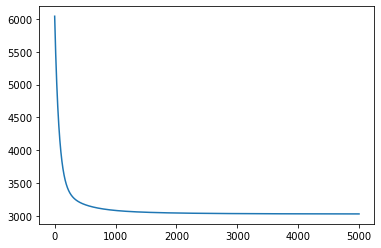

In [252]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

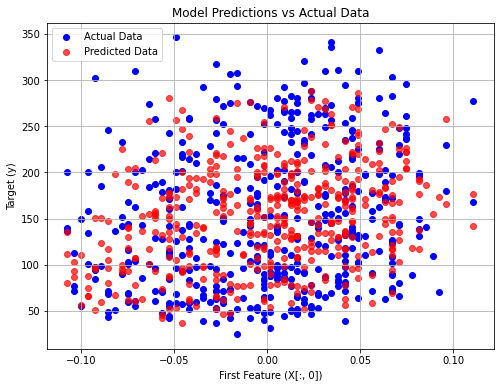

In [253]:
# X 데이터의 첫 번째 컬럼
X_first_num = df_X_num[:, 0]  # 첫 번째 컬럼 (age feature)

# 모델을 사용해 예측값 계산
y_pred = model(df_X_num, W, b)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(X_first_num, df_y_array, color="blue", label="Actual Data")  # 실제 타겟 데이터
plt.scatter(X_first_num, y_pred, color="red", alpha=0.7, label="Predicted Data")  # 예측된 데이터
plt.title("Model Predictions vs Actual Data")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Target (y)")
plt.legend()
plt.grid()
plt.show()

In [254]:
final_mse = loss(X_test, W, b, y_test)
print("Final MSE on Test Data:", final_mse)

Final MSE on Test Data: 2921.904366610906
